In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (14, 10)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor


import pickle


import warnings
warnings.filterwarnings("ignore")


In [55]:
import sklearn


sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [56]:
df = pd.read_csv("data/train_fe.csv", index_col=[0])

In [57]:
df

,item_identifier,item_weight,item_visibility,item_type,item_mrp,outlet_establishment_year,item_outlet_sales,item_fat_content_0,item_fat_content_1,item_fat_content_2,...,outlet_size_0,outlet_size_1,outlet_size_2,outlet_location_type_0,outlet_location_type_1,outlet_location_type_2,outlet_type_0,outlet_type_1,outlet_type_2,outlet_type_3
0,FDA15,9.300,0.016047,4,249.8092,14,8.225808,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.920,0.019278,14,48.2692,4,6.096776,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.500,0.016760,10,141.6180,14,7.648868,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.200,0.066132,6,182.0950,15,6.597664,1,0,0,...,0,0,1,0,0,1,1,0,0,0
4,NCD19,8.930,0.066132,9,53.8614,26,6.903451,0,0,1,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,13,214.5218,26,7.929984,0,1,0,...,1,0,0,0,0,1,0,1,0,0
8519,FDS36,8.380,0.046982,0,108.1570,11,6.310436,1,0,0,...,0,0,1,0,1,0,0,1,0,0
8520,NCJ29,10.600,0.035186,8,85.1224,9,7.085159,0,0,1,...,0,0,1,0,1,0,0,1,0,0
8521,FDN46,7.210,0.145221,13,103.1332,4,7.521100,1,0,0,...,0,1,0,0,0,1,0,0,1,0


---
# Train Test Split
---

In [58]:
X = df.drop(["item_identifier", "item_outlet_sales"], axis=1)
y= df["item_outlet_sales"]

## Linear Regression

In [59]:
models = [
    ["XGB Boots", XGBRegressor],
    ["Linear Regression", LinearRegression],
    ["Ridge", Ridge], 
    ["Lasso", Lasso],
    ["Decision Tree", DecisionTreeRegressor],
    ["Random Forrest", RandomForestRegressor], 
    ["Extra Tree", ExtraTreesRegressor]
    ]


In [71]:
model = DecisionTreeRegressor()
model.fit(X,y)
pred = model.predict(X)
r2 = r2_score(y, pred)
mae = mean_absolute_error(y, pred)
mse = mean_squared_error(y, pred)
msre = mean_squared_error(y,pred, squared=False)
r2, mae, mse, msre

(1.0, 9.378863988385693e-19, 8.330104595786819e-34, 2.886192058021576e-17)

In [73]:
#models = Ridge

name_list = []
MAE_list = []
MSE_list = []
MSRE_list = []
R2_score = []
for name, model in models:
    m = model()
    m.fit(X,y)
    pred = m.predict(X)
    mae = mean_absolute_error(y, pred)
    mse = mean_squared_error(y, pred)
    msre = mean_squared_error(y,pred, squared=False)
    r2 = r2_score(y, pred)
    # cv_score = cross_val_score(m, X, y, scoring="neg_mean_squared_error", cv=5)
    # cv_score = np.abs(np.mean(cv_score))
    name_list.append(name)
    MAE_list.append(mae)
    MSE_list.append(mse)
    MSRE_list.append(msre)
    R2_score.append(r2)
    #CV_score_list.append(cv_score)
    scores = pd.DataFrame(
        {"model": name_list,
        "MAE": MAE_list,
        "MSE": MSE_list,
        "MSRE": MSRE_list,
        "R2 Score": R2_score}
        )
# for name, model in models_1:
#     m = model()
#     m.fit(X,y)
#     pred = m.predict(X)
#     cv_score = cross_val_score(m, X, y, scoring="neg_mean_squared_error", cv=5)
#     cv_score = np.abs(np.mean(cv_score))
#     name_list.append(name)
#     MSE_list.append(mean_squared_error(y,pred))
#     CV_score_list.append(cv_score)
#     scores = pd.DataFrame(
#         {"model": name_list,
#         "MSE": MSE_list,
#         "CV_Score": CV_score_list}
#         )
    


In [74]:
scores

,model,MAE,MSE,MSRE,R2 Score
0,XGB Boots,2.830328e-01,1.376427e-01,3.710023e-01,0.866435
1,Linear Regression,4.162118e-01,2.880065e-01,5.366624e-01,0.720527
2,Ridge,4.162104e-01,2.880066e-01,5.366625e-01,0.720527
3,Lasso,6.637466e-01,7.628689e-01,8.734236e-01,0.259734
4,Decision Tree,6.252576e-19,5.553403e-34,2.356566e-17,1.000000
5,Random Forrest,1.591524e-01,4.225969e-02,2.055716e-01,0.958992
6,Extra Tree,8.784557e-15,1.043898e-28,1.021713e-14,1.000000


In [42]:
def train_model(model, X, y):
    model.fit(X,y)

    pred = model.predict(X)

    cv_score = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print("Model Report")
    print("MSE:", mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 0.28818799675866813
CV Score: 0.28923563532956764


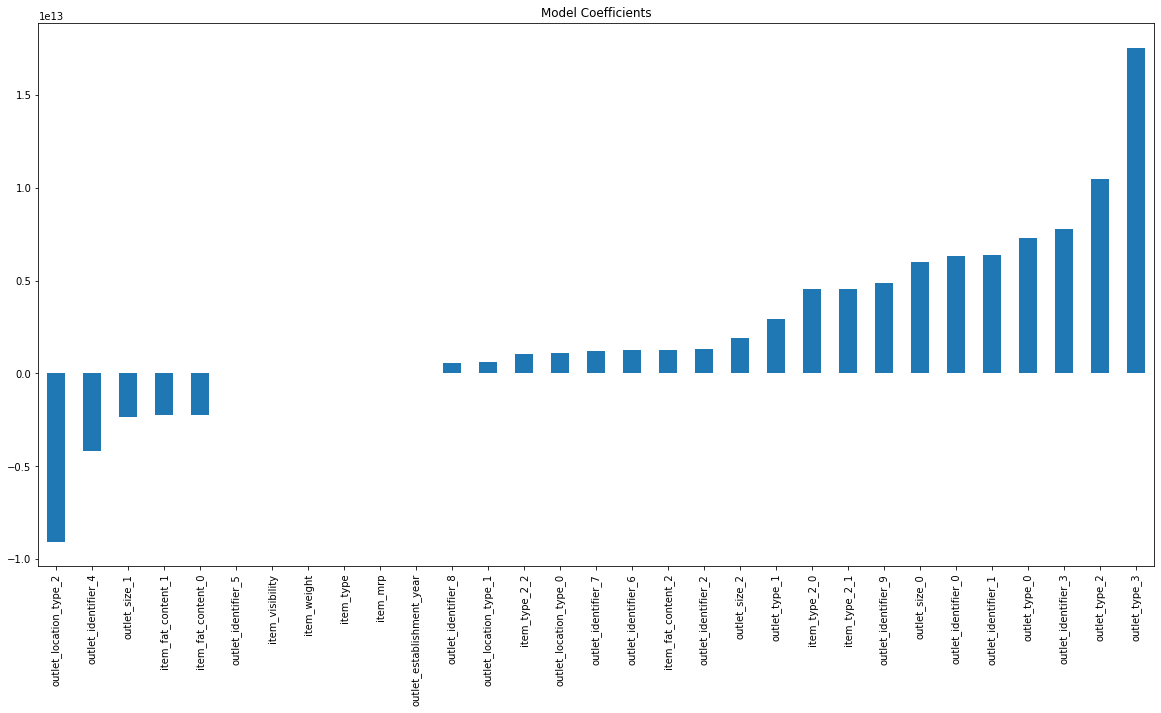

In [43]:
model = LinearRegression(normalize=True)

train_model(model, X, y)
coef= pd.Series(model.coef_, X.columns).sort_values()
plt.figure(figsize=(20,10))
coef.plot(kind="bar", title="Model Coefficients");


# Ridge

Model Report
MSE: 0.3910108972916129
CV Score: 0.39195698800427164


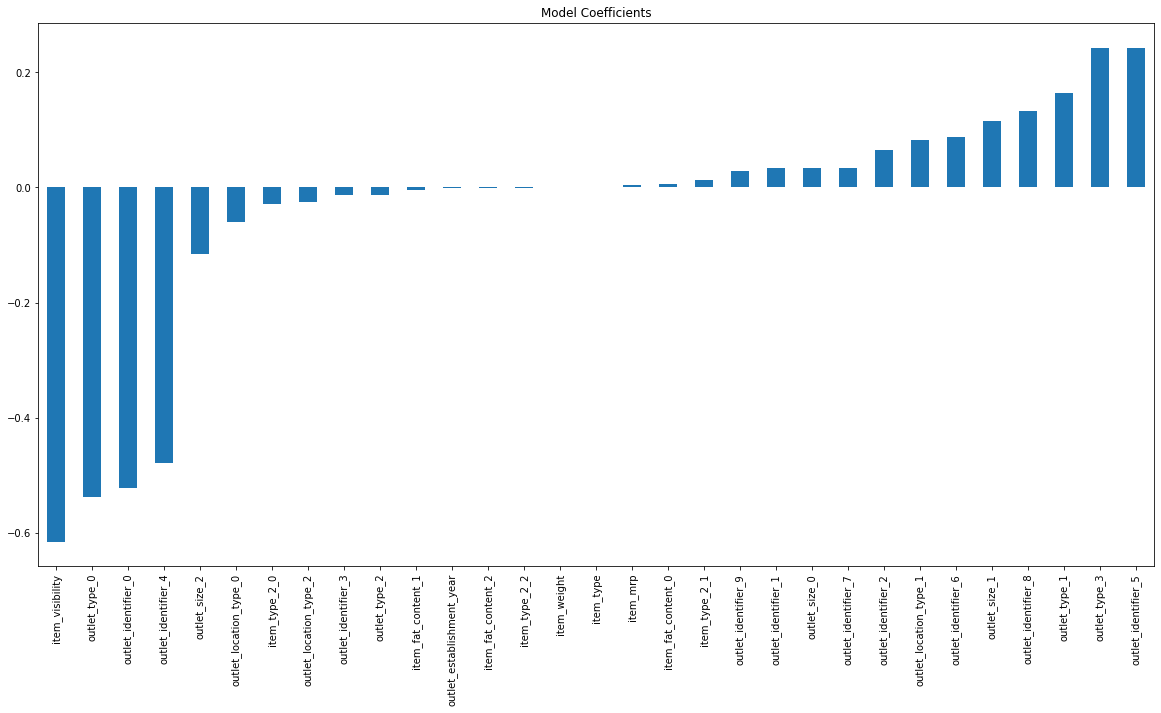

In [44]:
model = Ridge(normalize=True)

train_model(model, X, y)
coef= pd.Series(model.coef_, X.columns).sort_values()
plt.figure(figsize=(20,10))
coef.plot(kind="bar", title="Model Coefficients");


## Lasso

Model Report
MSE: 1.0305333080087593
CV Score: 1.030781898345697


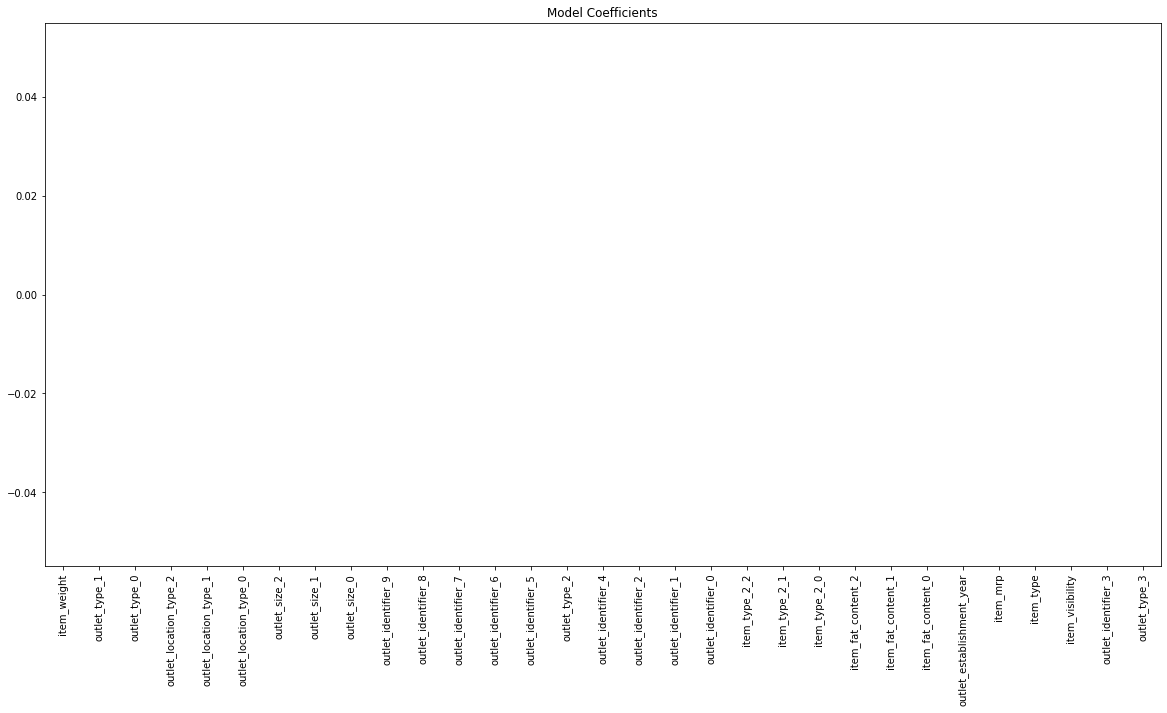

In [45]:
model = Lasso(normalize=True)

train_model(model, X, y)
coef= pd.Series(model.coef_, X.columns).sort_values()
plt.figure(figsize=(20,10))
coef.plot(kind="bar", title="Model Coefficients");


## Decision Tree

Model Report
MSE: 8.330104595786819e-34
CV Score: 0.5789595857841556


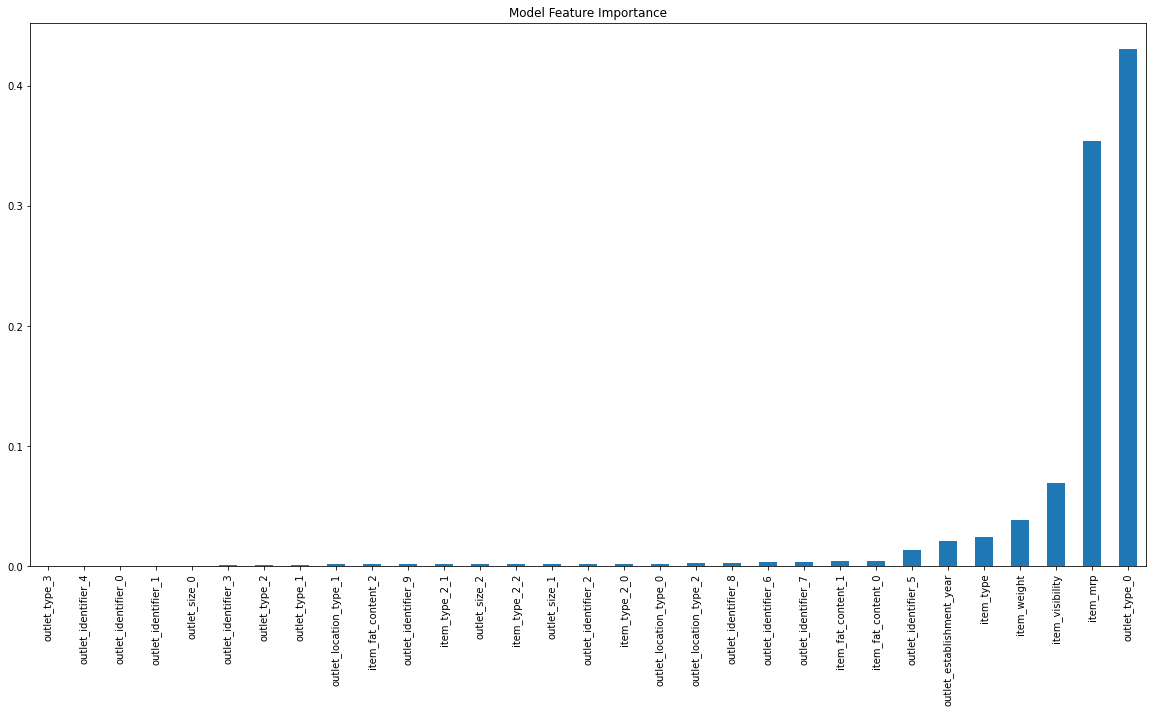

In [46]:
model = DecisionTreeRegressor()

train_model(model, X, y)
coef= pd.Series(model.feature_importances_, X.columns).sort_values()
plt.figure(figsize=(20,10))
coef.plot(kind="bar", title="Model Feature Importance");


## Random Forrest

Model Report
MSE: 0.04171649479776141
CV Score: 0.30644603765176354


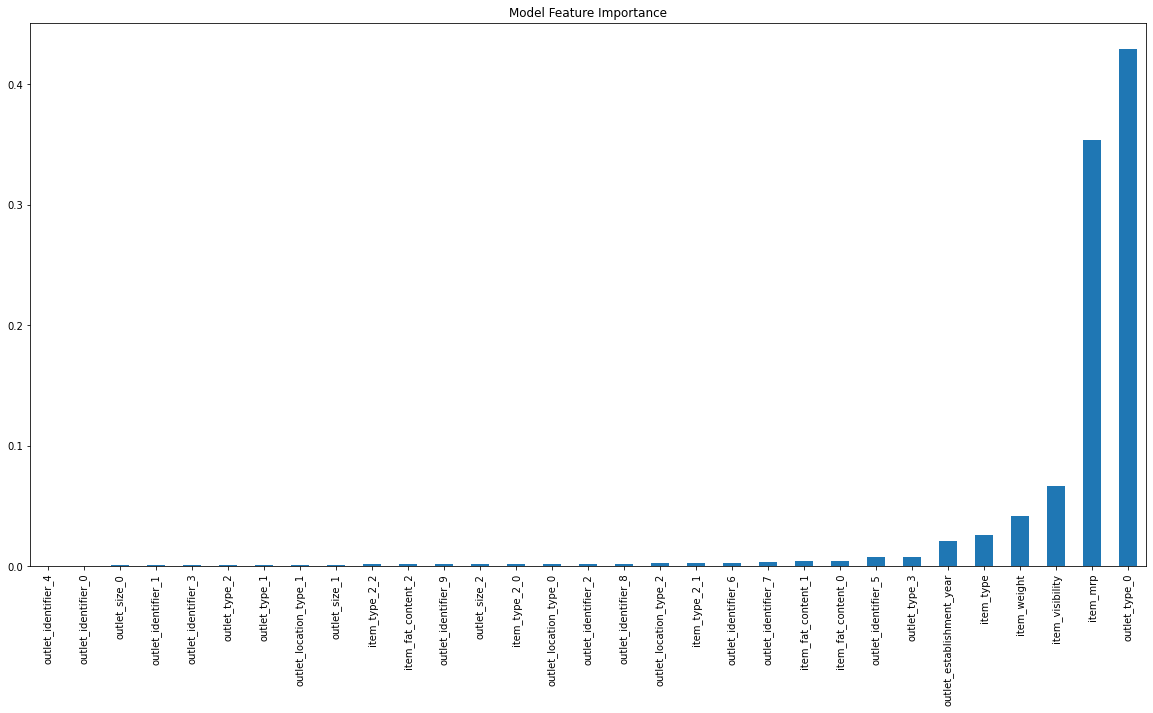

In [47]:
model = RandomForestRegressor()

train_model(model, X, y)
coef= pd.Series(model.feature_importances_, X.columns).sort_values()
plt.figure(figsize=(20,10))
coef.plot(kind="bar", title="Model Feature Importance");


Model Report
MSE: 1.043898164227153e-28
CV Score: 0.3284353391826952


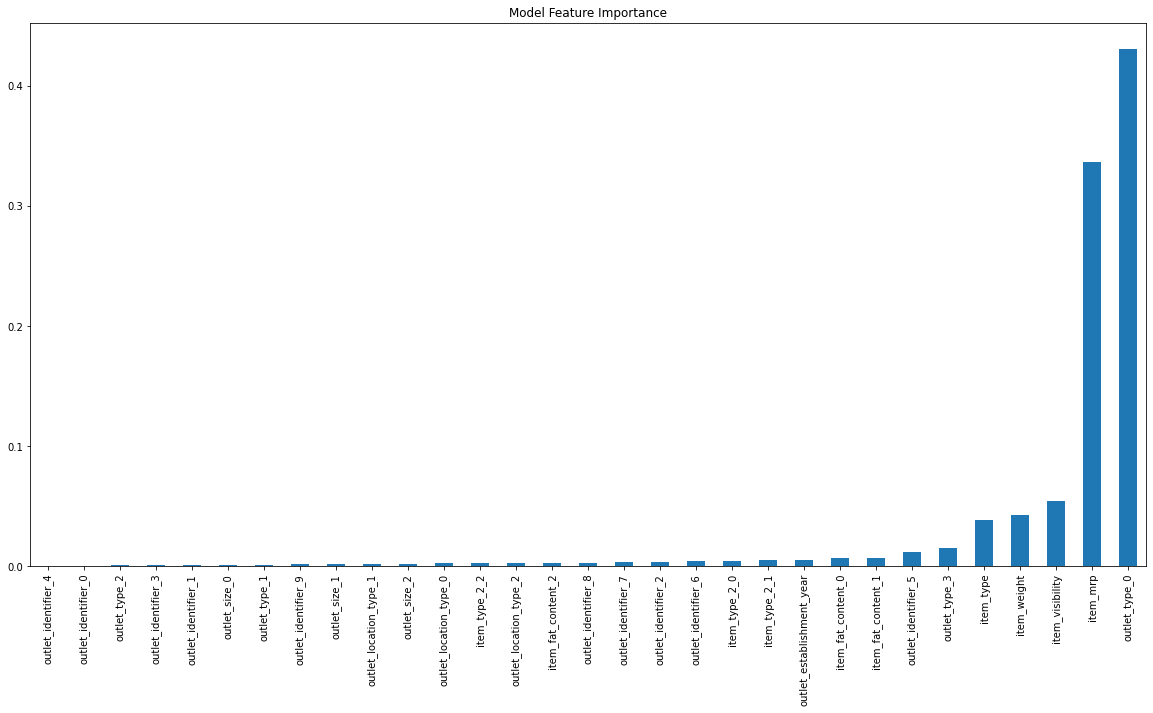

In [48]:
model = ExtraTreesRegressor()

train_model(model, X, y)
coef= pd.Series(model.feature_importances_, X.columns).sort_values()
plt.figure(figsize=(20,10))
coef.plot(kind="bar", title="Model Feature Importance");
